In [1]:
from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader
import torch
from torch import nn
from torch import optim

In [2]:
import os
import numpy as np

from tqdm import tqdm_notebook as tqdm
# from tqdm import tqdm as tqdm

from matplotlib import pyplot as plt

In [3]:
# from google.colab import files

# if not os.path.exists('./models'):
#     os.mkdir('./models')

In [4]:
# !wget https://raw.githubusercontent.com/andriygav/DeepGenerativeModels/IWAE/src/DeepGenerativeModels/AutoEncoders.py
    
# !wget https://raw.githubusercontent.com/andriygav/DeepGenerativeModels/IWAE/examples/utils.py
    
# !wget -P ./models https://github.com/andriygav/DeepGenerativeModels/blob/IWAE/examples/models/iwae_d_2_k_50.model?raw=true
    
# !wget -P ./models https://github.com/andriygav/DeepGenerativeModels/blob/IWAE/examples/models/vae_d_2.model?raw=true
    

In [5]:
# from AutoEncoders import VAE, IWAE

In [6]:
from DeepGenerativeModels.AutoEncoders import VAE, IWAE

In [7]:
import utils

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [9]:
data = MNIST('mnist', download=True, train=True)
train_data = TensorDataset(data.train_data.view(-1, 28 * 28).float() / 255, data.train_labels)
data = MNIST('mnist', download=True, train=False)
test_data = TensorDataset(data.test_data.view(-1, 28 * 28).float() / 255, data.test_labels)

# Обучение

## VAE

In [10]:
model_vae = VAE(2, 28*28, device=device)

In [11]:
optimizer = optim.Adam(model_vae.parameters(), lr=0.001)

In [12]:
# utils.trainer(model = model_vae, 
#         optimizer = optimizer, 
#         dataset = train_data, 
#         count_of_epoch = 40,
#         batch_size = 64,
#         callback = None,
#         progress = tqdm)

In [13]:
# torch.save(model_vae.state_dict(), './models/vae_d_2.model')
# files.download('./models/vae_d_2.model')

In [14]:
model_vae.load_state_dict(torch.load('./models/vae_d_2.model', map_location=device))

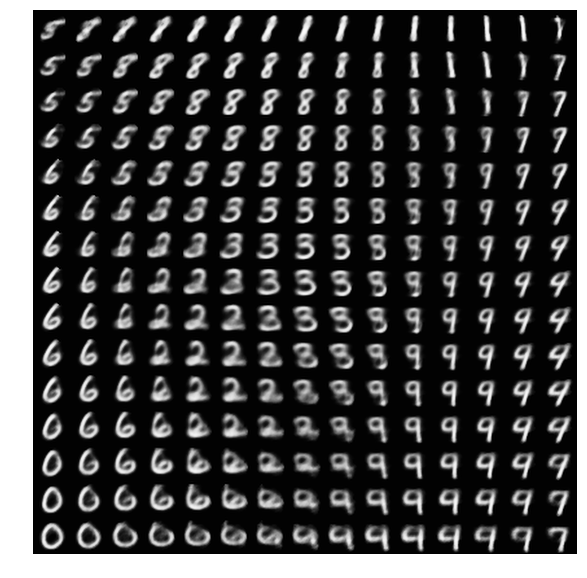

In [15]:
figure = utils.draw_samples_grid_vae(model_vae)

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r', vmin=0, vmax=1, interpolation='lanczos')
plt.axis('off')
plt.show()

## IWAE

In [16]:
model_iwae = IWAE(2, 28*28, K = 50, device=device)

In [17]:
optimizer = optim.Adam(model_iwae.parameters(), lr=0.001)

In [18]:
# utils.trainer(model = model_iwae, 
#                 optimizer = optimizer, 
#                 dataset = train_data,
#                 count_of_epoch = 40,
#                 batch_size = 64,
#                 callback = None,
#                 progress = tqdm)

In [19]:
# torch.save(model_iwae.state_dict(), './models/iwae_d_2_k_50.model')
# files.download('./models/iwae_d_2_k_50.model')

In [20]:
model_iwae.load_state_dict(torch.load('./models/iwae_d_2_k_50.model', map_location=device))

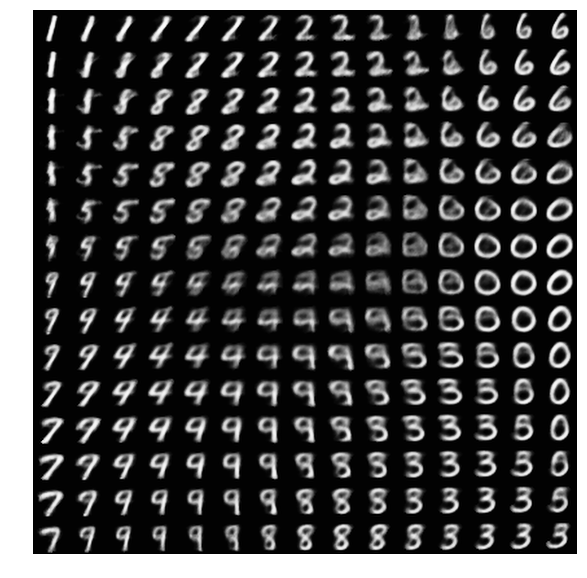

In [21]:
figure = utils.draw_samples_grid_vae(model_iwae)

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r', vmin=0, vmax=1, interpolation='lanczos')
plt.axis('off')
plt.show()

# Digits Reconstruction

In [22]:
batch_x, batch_y = list(DataLoader(test_data, batch_size = 5))[2]

## VAE

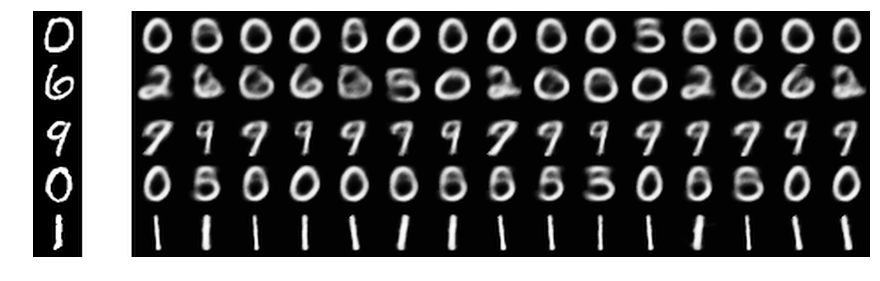

In [23]:
figure = utils.draw_reconstucted_samples(model_iwae, batch_x, IW_sampler = False)


plt.figure(figsize=(15, 15))
plt.imshow(figure, cmap='Greys_r', vmin=0, vmax=1, interpolation='lanczos')
plt.axis('off')
plt.show()

## IWAE

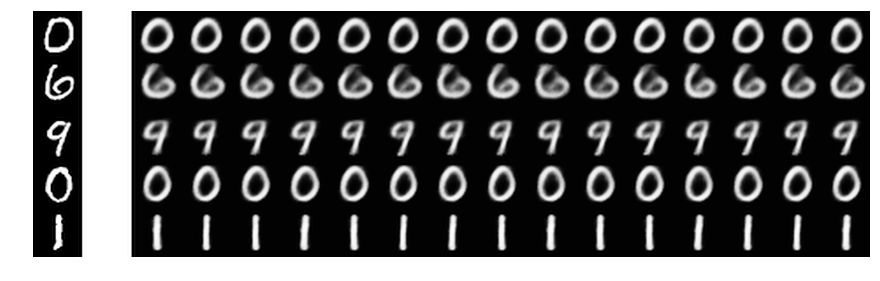

In [24]:
figure = utils.draw_reconstucted_samples(model_iwae, batch_x, IW_sampler = True)


plt.figure(figsize=(15, 15))
plt.imshow(figure, cmap='Greys_r', vmin=0, vmax=1, interpolation='lanczos')
plt.axis('off')
plt.show()